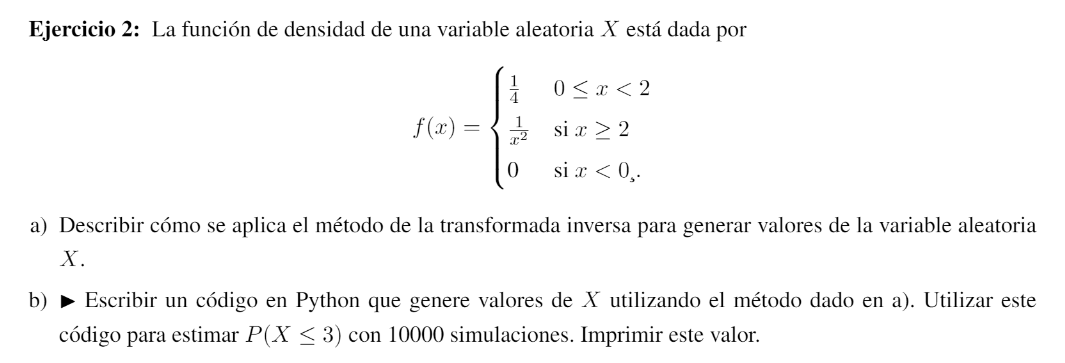

In [ ]:
import random

def f(x):
  if x >= 0 and x < 2:
    return 0.25
  if x >= 2:
    return 1/x**2
  else:
    return 0

def Ejercicio2():
  u = random.random()
  if u < 1/2:
    return 4*u
  else:
    return 1/(1-u)

# Calcula P(x <= a)
def Probabilidad(a, nsim):
  menos_que_a = 0
  for _ in range(nsim):
    if Ejercicio2() < a:
      menos_que_a += 1
  return menos_que_a / nsim

Probabilidad(3, 1_000_000)


0.666157

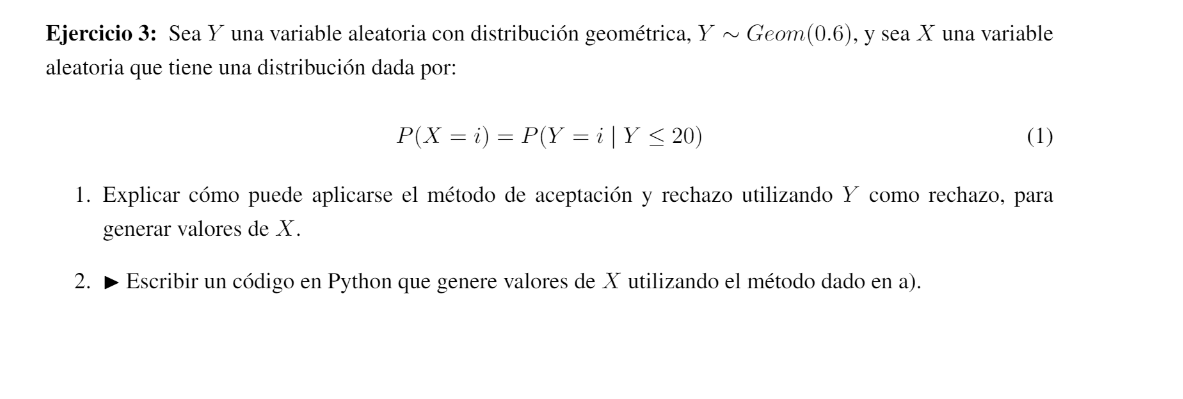

In [25]:
from numpy import log
from random import random

"""
1 Simular Y
2 U = random()
3 if U < p(Y) / (c * q(Y)):
4   return Y ## aceptacion: X=Y ´
5 else:
6   volver a 1 ## rechazo

"""
def prob_geometrica(p, a):
  return p * (1-p)**(a-1)

def acumulada_geometrica(p, a):
  return 1 - (1-p)**(a-1)

def geometrica(p):
  U = random()
  return int(log(1-U)/log(1-p))+1

def generarX(p=0.6):
  c = prob_geometrica(p, 1) / prob_geometrica(p, 4)
  while True:
    u = random()
    y = geometrica(p)
    if y <= 20:
      if u < 0.6 / (c * prob_geometrica(p, y)):
        return y

sum = 0
nsim = 1_000_000
for _ in range(nsim):
  sum += generarX()
print(sum/nsim)

2.952878


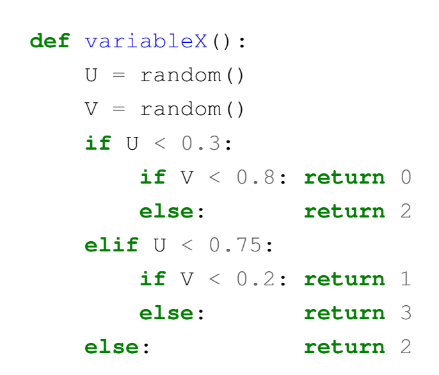

In [ ]:
def variableX():
  U = random()
  V = random()
  if U < 0.3:
    if V < 0.8:
      return 0
    else:
      return 2
  elif U < 0.75:
    if V < 0.2:
      return 1
    else:
      return 3
  else:
    return 2

def transformadaInversa():
  U = random()
  if U < 0.09:
    return 1
  if U < 0.33:
    return 0
  if U < 0.64:
    return 2
  else:
    return 3

a = [0,0,0,0]
b = [0,0,0,0]
nsim = 1_000_000
for i in range(nsim):
  a[variableX()] += 1
  b[transformadaInversa()] += 1
print([i/nsim for i in a])
print([i/nsim for i in b])

[0.239353, 0.089915, 0.310755, 0.359977]
[0.239248, 0.090305, 0.309775, 0.360672]


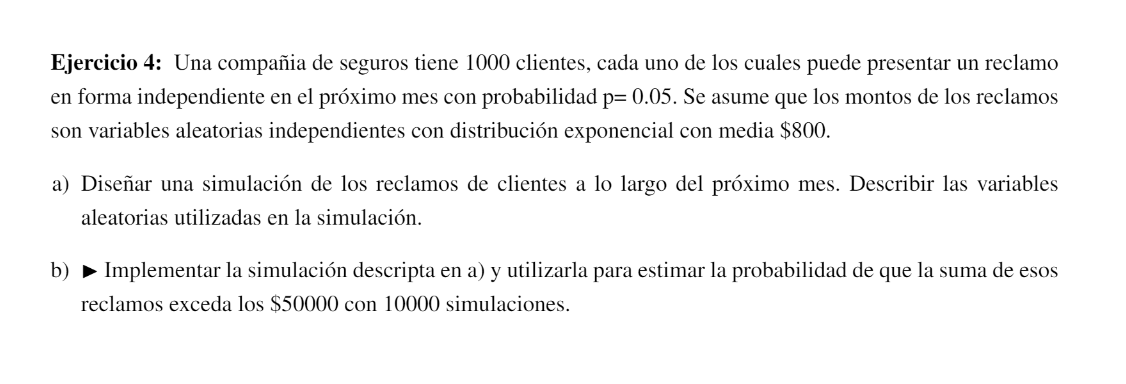

In [22]:
from random import random
from numpy import log

def exponencial(lamda):
  U = 1-random()
  return -log(U)/lamda

# Para evitar tiempos de computos largos,
# consideramos 800 como 8 y 50000 como 500
# Es decir, trabajamos con dos ordenes de magnitud menos

def Ejercicio4(p=0.05,clientes=1000,lamda=1/800):
  reclamos = 0
  monto = 0
  for cliente in range(clientes):
    u = random()
    # Si el cliente hace un reclamo
    if u < 0.05:
      reclamos += 1
      monto += exponencial(lamda)
  return monto, reclamos

def simulacion(nsim=10000, tope=50000):
  suma_excedidos = 0
  for _ in range(nsim):
    if Ejercicio4()[0] > tope:
      suma_excedidos += 1
  print(suma_excedidos / nsim)

simulacion()


0.1069
